# Dynamic Programming ( 동적 계획법 )

- 하나의 문제를 단 한 번만 풀도록 하는 알고리즘
- 큰 문제를 작은 문제들로 쪼개서 작은 문제를 통해 구한 해를 이용하여 큰 문제의 해를 구하는 방법


## 메모이제이션 

- 작은 문제에서 이미 계산한 값을 저장해두었다가 큰 문제를 풀 때 작은 문제에서 풀었던 답을 활용하여 큰 문제의 정답을 구하는 방법
- 아래 예시에서 4번을 구할 때 이미 f(2)를 구했기 때문에 8번 계산을 생략할 수 있다.

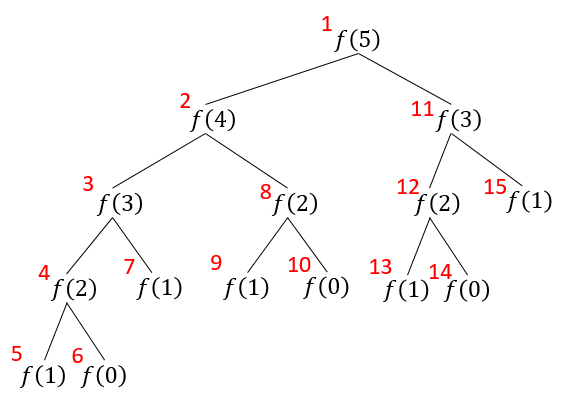

## Top-Down 방식

### 내가 원하는 값을 먼저 부르고 이후에 필요한 값들을 수집해나가는 방식
### 피보나치를 예로 들면 f(n)=f(n−1)+f(n−2) 에서 f(n)을 구하기 위해 f(n-1)과 f(n-2)를 수집하는 것

In [184]:
memo = [0]*110

def fibo(n):
    # 종료조건
    if n == 1 or n == 2: return 1
    
    # 이미 계산했으면 메모해 놓은 것을 반환
    if memo[n] != 0: return memo[n]
    
    # 메모되지 않은 계산은 계산해서 메모에 저장
    memo[n] = fibo(n-1) + fibo(n-2)
    return memo[n]

fibo(99)

218922995834555169026

# Bottom-UP 방식

### 아래에서부터 차근차근 올라가는 방식으로 내가 목표한 값까지 계산해 나가는 것
### 사실상 f(1), f(2)부터 차례대로 계산하는 것과 다를바 없음

In [183]:
dp = [0]*100

# n = 1, 2초기화
dp[1] = 1
dp[2] = 1
n = 99

for i in range(3, n+1):
    dp[i] = dp[i-1] + dp[i-2]

print(dp[n])

218922995834555169026


# 예시 문제 1. 동전 바꾸기

### 문제 설명

Finn은 편의점에서 야간 아르바이트를 하고 있습니다. 야간에 손님이 너무 없어 심심한 Finn은 손님들께 거스름돈을 n 원을 줄 때 방법의 경우의 수를 구하기로 하였습니다. 

예를 들어서 손님께 5원을 거슬러 줘야 하고 1원, 2원, 5원이 있다면 다음과 같이 4가지 방법으로 5원을 거슬러 줄 수 있습니다. 

1원을 5개 사용해서 거슬러 준다.

1원을 3개 사용하고, 2원을 1개 사용해서 거슬러 준다.

1원을 1개 사용하고, 2원을 2개 사용해서 거슬러 준다.

5원을 1개 사용해서 거슬러 준다.

거슬러 줘야 하는 금액 n과 Finn이 현재 보유하고 있는 돈의 종류 money가 매개변수로 주어질 때, Finn이 n 원을 거슬러 줄 방법의 수를 return 하도록 solution 함수를 완성해 주세요.

### 제한 사항

- n은 100,000 이하의 자연수입니다.
- 화폐 단위는 100종류 이하입니다.
- 모든 화폐는 무한하게 있다고 가정합니다.
- 정답이 커질 수 있으니, 1,000,000,007로 나눈 나머지를 return 해주세요.

### 입출력 예

n = 5

money = [1, 2, 5]

result = 4

In [ ]:
def solution(n, money):
    # dp 테이블 
    dp = [1] + [0]*n
    
    for coin in money:
        
        # 거스름돈을 줄 때 현재 거슬러줘야하는 돈의 액수보다 
        # 가진 돈의 액수가 크면 고려하지 않기 때문에 n+1까지 루프를 돔
        for price in range(coin, n+1):
            dp[price] += dp[price - coin]
            
    return dp[n] % 1000000007

# 예시 문제 2. LCS( Longest Common Sequence)

### 문제 설명

LCS(Longest Common Subsequence, 최장 공통 부분 수열)문제는 두 수열이 주어졌을 때, 모두의 부분 수열이 되는 수열 중 가장 긴 것을 찾는 문제이다.

예를 들어, ACAYKP와 CAPCAK의 LCS는 ACAK가 된다.


### 출력 예시

문장 1 : ACAYKP

문장 2 : CAPCAK

출력 : 4

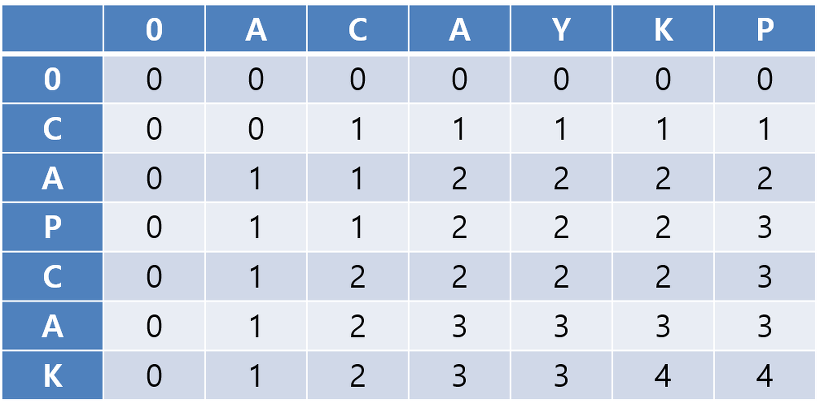

In [185]:
a = "ACAYKP"
b = "CAPCAK"

# 2차원 dp table
dp = [[0]*(len(b)+1) for _ in range(len(a)+1)]

# 먼저 a를 돌며 b와 겹치는 문자가 있는지 쭉 확인
for i in range(1, len(a)+1):
    for j in range(1, len(b)+1):
        
        # 겹치는 문자가 있을 때는 dp table에서 
        # a,b가 겹치는 부분에 1더해주기
        if a[i-1] == b[j-1]:
            dp[i][j] = dp[i-1][j-1] + 1
        
        # 만약 겹치지 않으면 dp table에서 왼쪽, 위 중에 큰 수로 수정
        else:
            dp[i][j] = max(dp[i-1][j], dp[i][j-1])

print(dp[-1][-1])

4
